Скачиваем данные и сохраняем в датафрейм

In [0]:
import pandas as pd
url = 'https://github.com/daryamukh/comics/blob/master/marvel.csv?raw=true'
powers = pd.read_csv(url)

Знакомимся с данными

In [0]:
powers.head(6)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man,\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America,\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,Wolverine,\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,Iron Man,\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor,\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
5,2458,Benjamin Grimm,\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0


In [0]:
powers.tail(6)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
16370,674414,Phoenix's Shadow,\/Phoenix%27s_Shadow_(Earth-616),NaN,Neutral Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN
16371,657508,Ru'ach,\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane,\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer,\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421,\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16375,673702,Yologarch,\/Yologarch_(Earth-616),NaN,Bad Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN


In [0]:
powers.shape

(667, 168)

Добавляем новое поле - сумму суперспособностей

In [0]:
powers['total'] = powers.sum(axis=1)

Сортируем датафрейм по убыванию суммы суперспособностей

In [0]:
powers.sort_values('total',ascending=False).head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,...,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total
563,Spectre,True,True,False,True,False,False,True,True,True,False,False,True,False,False,False,True,True,True,False,True,False,True,True,True,True,True,False,False,False,False,True,True,False,False,True,True,True,True,False,...,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,49
18,Amazo,True,False,True,False,False,True,False,False,True,False,True,True,False,True,False,True,True,True,True,True,False,True,True,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,44
394,Martian Manhunter,True,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,True,True,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,35
370,Living Tribunal,True,True,False,True,False,False,True,True,True,False,False,False,False,False,False,False,True,True,False,True,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,35
388,Man of Miracles,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,34


Переписываем powers с учетом весов

In [0]:
weights = powers.sum(axis=0)

In [0]:
weights.head()

hero_names               3-D ManA-BombAbe SapienAbin SurAbominationAbra...
Agility                                                                242
Accelerated Healing                                                    178
Lantern Power Ring                                                      11
Dimensional Awareness                                                   25
dtype: object

Рассмотрим сначала суперспособность Agility и познакомимся с columns , index , iloc

In [0]:
powers.columns[1]

'Agility'

In [0]:
weights.index[1]

'Agility'

In [0]:
rows,columns =  powers.shape

In [0]:
columns

169

In [0]:
# чем уникальней суперспособность (есть у меньшего количества героев) , тем больший присвоим ей вес
rows - weights[1]

425

if   условие:
> делай_1


   
else:
> делай_2

In [0]:
if powers.columns[1] == weights.index[1]:
  powers.iloc[:,1] = powers.iloc[:,1] * (rows - weights[1])

In [0]:
powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,...,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Google Spreadsheets,SQL,Python,Tableau,total
0,3-D Man,426,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,308,0,0,0,0,0,0,0,379,0,0,0,0,419,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,A-Bomb,0,490,0,0,0,411,0,0,0,0,0,0,0,0,0,555,0,308,0,0,0,0,0,0,0,379,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,Abe Sapien,426,490,0,0,621,411,0,0,0,0,647,549,563,0,0,555,510,308,0,576,0,0,0,0,0,379,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,Abin Sur,0,0,657,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,Abomination,0,490,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,308,0,0,0,0,0,0,0,379,0,0,0,0,419,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


**range ( старт , стоп , шаг)**

In [0]:
for i in range(1, 9,2 ):
  print(i)

1
3
5
7


In [0]:
columns - 1

168

In [0]:
#напишем цикл для всех суперспособностей
for i in range(2, columns - 1 ):
  if powers.columns[i] == weights.index[i]:
    powers.iloc[:,i] = powers.iloc[:,i] * (rows - weights[i])

In [0]:
powers.tail()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,...,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Google Spreadsheets,SQL,Python,Tableau,total
663,Ymir,0,0,0,0,621,411,0,0,0,0,0,0,0,0,0,555,0,308,649,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
664,Yoda,426,0,0,0,0,0,542,0,0,638,0,549,563,0,0,555,510,0,0,576,0,521,0,0,0,379,0,0,0,0,419,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
665,Zatanna,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,649,576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,666,0,0,0,0,660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
666,Zoom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,419,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
667,SuperAnalyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [0]:
powers['total_new'] = powers.iloc[:,:168].sum(axis=1)

In [0]:
powers.sort_values('total_new', ascending=False)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,...,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Google Spreadsheets,SQL,Python,Tableau,total,total_new
563,Spectre,425.0,489.0,0.0,642.0,0.0,0.0,541.0,590.0,455.0,0.0,0.0,548.0,0.0,0.0,0.0,554.0,509.0,307.0,0.0,575.0,0.0,520.0,651.0,612.0,652.0,378.0,0.0,0.0,0.0,0.0,418.0,659.0,0.0,0.0,645.0,657.0,660.0,595.0,0.0,...,0.0,645.0,647.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,648.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,651.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,29243.0
18,Amazo,425.0,0.0,656.0,0.0,0.0,410.0,0.0,0.0,455.0,0.0,646.0,548.0,0.0,659.0,0.0,554.0,509.0,307.0,648.0,575.0,0.0,520.0,651.0,612.0,0.0,378.0,0.0,0.0,0.0,0.0,418.0,0.0,0.0,609.0,0.0,0.0,0.0,595.0,578.0,...,0.0,645.0,0.0,0.0,0.0,648.0,0.0,0.0,644.0,0.0,633.0,0.0,0.0,0.0,0.0,0.0,0.0,648.0,0.0,0.0,0.0,0.0,644.0,644.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,25737.0
370,Living Tribunal,425.0,489.0,0.0,642.0,0.0,0.0,541.0,590.0,455.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509.0,307.0,0.0,575.0,0.0,520.0,0.0,612.0,0.0,0.0,0.0,0.0,0.0,0.0,418.0,0.0,0.0,0.0,0.0,0.0,660.0,0.0,0.0,...,0.0,645.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,656.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,651.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20663.0
388,Man of Miracles,0.0,489.0,0.0,642.0,0.0,0.0,0.0,590.0,0.0,637.0,0.0,0.0,0.0,0.0,0.0,554.0,509.0,307.0,0.0,575.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,418.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,651.0,0.0,0.0,0.0,0.0,0.0,0.0,665.0,665.0,0.0,0.0,0.0,0.0,34.0,20551.0
394,Martian Manhunter,425.0,0.0,0.0,0.0,0.0,410.0,541.0,0.0,455.0,0.0,0.0,548.0,0.0,0.0,0.0,0.0,509.0,307.0,0.0,575.0,0.0,0.0,0.0,612.0,0.0,378.0,0.0,0.0,0.0,0.0,418.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,578.0,...,0.0,645.0,0.0,0.0,0.0,648.0,0.0,0.0,644.0,0.0,633.0,645.0,0.0,0.0,0.0,0.0,0.0,648.0,0.0,0.0,0.0,0.0,644.0,644.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20103.0
420,Mister Mxyzptlk,425.0,489.0,0.0,642.0,0.0,0.0,0.0,0.0,455.0,0.0,0.0,0.0,0.0,0.0,0.0,554.0,509.0,0.0,648.0,0.0,0.0,520.0,651.0,0.0,652.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,659.0,0.0,0.0,0.0,651.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,18707.0
597,T-X,425.0,489.0,0.0,0.0,620.0,410.0,541.0,0.0,0.0,0.0,0.0,548.0,562.0,0.0,0.0,554.0,509.0,307.0,0.0,0.0,0.0,520.0,0.0,0.0,0.0,378.0,0.0,0.0,0.0,0.0,418.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,578.0,...,0.0,0.0,0.0,0.0,0.0,648.0,0.0,0.0,0.0,0.0,633.0,645.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,644.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,18675.0
139,Captain Marvel,425.0,489.0,0.0,0.0,620.0,410.0,0.0,590.0,455.0,637.0,0.0,548.0,0.0,0.0,0.0,554.0,509.0,307.0,0.0,0.0,0.0,520.0,0.0,0.0,0.0,378.0,0.0,0.0,0.0,0.0,418.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,...,661.0,0.0,0.

In [0]:
powers.tail()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,...,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Google Spreadsheets,SQL,Python,Tableau,total,total_new
663,Ymir,0.0,0.0,0.0,0.0,620.0,410.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,554.0,0.0,307.0,648.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3137.0
664,Yoda,425.0,0.0,0.0,0.0,0.0,0.0,541.0,0.0,0.0,637.0,0.0,548.0,562.0,0.0,0.0,554.0,509.0,0.0,0.0,575.0,0.0,520.0,0.0,0.0,0.0,378.0,0.0,0.0,0.0,0.0,418.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,661.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,10573.0
665,Zatanna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,648.0,575.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,665.0,0.0,0.0,0.0,0.0,659.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5117.0
666,Zoom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,418.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2346.0
667,SuperAnalyst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4002.0,5146.0,6550.0,5303.0,4.0,21001.0


In [0]:
powers.shape

(668, 175)

In [0]:
 powers.iloc[667,172 ] = 4

In [0]:
powers.iloc[0,173]

1528.0

In [0]:
#powers.iloc[667,0] =   'SuperAnalyst'
powers['Google Spreadsheets'] = False
powers['SQL'] = False
powers['Python'] = False
powers['Tableau'] = False

Сохраняем результат

In [0]:
powers.to_csv('marvel.csv')

In [0]:
from google.colab import files
files.download('marvel.csv')

# API

https://developer.marvel.com/docs#!/public/getCreatorCollection_get_0

- Создать аккаунт на marvel.com  https://www.marvel.com/register
- Получить ключи для api  https://developer.marvel.com/ ->  Get a Key ( или Get Started)
- Публичный и приватный ключи будут доступны тут https://developer.marvel.com/account
- Добавьте их  в publicKey =   и  privateKey=  

In [0]:
import json
import requests
import hashlib
import datetime
import time

publicKey = '' 
privateKey=''
url='http://gateway.marvel.com'

ts =datetime.datetime.now().strftime('%Y-%m-%d%H:%M:%S')
hash_md5 = hashlib.md5()
hash_md5.update(f'{ts}{privateKey}{publicKey}'.encode('utf-8'))
hashed_params = hash_md5.hexdigest()

params = {'ts': ts, 'apikey': publicKey, 'hash': hashed_params};
res = requests.get('https://gateway.marvel.com:443/v1/public/comics',
                   params=params)
res 

<Response [500]>

In [0]:
from pprint import pprint
results = res.json()
pprint(results)

Достаем пары персонажей из одного комикса

In [0]:
from pandas.io.json import json_normalize
from itertools import combinations
import pandas as pd

data_results = json_normalize(results['data']['results'])

hero_network = pd.DataFrame()
for i in range(0,len(data_results)-1):
  names=[]
  for j in range(0,len(data_results['characters.items'][i])-1):
      names.append(data_results['characters.items'][i][j]['name'])
  hero_network = hero_network.append(pd.DataFrame(list(combinations(names,2)))) 

Добавляем оффсет

In [0]:
hero_network = pd.DataFrame()

for k in range(0,300,100):
  params = {'ts': ts, 'apikey': publicKey, 'hash': hashed_params , 'limit':100, 'offset': k};
  res = requests.get('https://gateway.marvel.com:443/v1/public/comics',
                   params=params)
  results = res.json()
  data_results = json_normalize(results['data']['results'])
  for i in range(0,len(data_results)-1):
    names=[]
    for j in range(0,len(data_results['characters.items'][i])-1):
       names.append(data_results['characters.items'][i][j]['name'])
    hero_network = hero_network.append(pd.DataFrame(list(combinations(names,2)))) 
  print(k, len(hero_network))

Строим граф

In [0]:
from networkx import spring_layout, fruchterman_reingold_layout
import numpy as  np
import matplotlib.pyplot as plt
import networkx as nx

network=np.array(hero_network)
ind=network[:,1]=='hero'

data=network
plt.figure(dpi=100,figsize=(20,20))
G = nx.Graph()
G.add_edges_from(data[:1000])

nx.draw(G ,node_color='y',node_size=100,with_labels=True,font_size=5,pos=fruchterman_reingold_layout(G))
plt.show()
 

Строим граф на основе csv

In [0]:
import pandas as pd
from networkx import spring_layout, fruchterman_reingold_layout
import numpy as  np
import matplotlib.pyplot as plt
import networkx as nx

hero_network = pd.read_csv('https://github.com/daryamukh/comics/blob/master/hero-network.csv?raw=true') 

In [0]:
hero_network.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


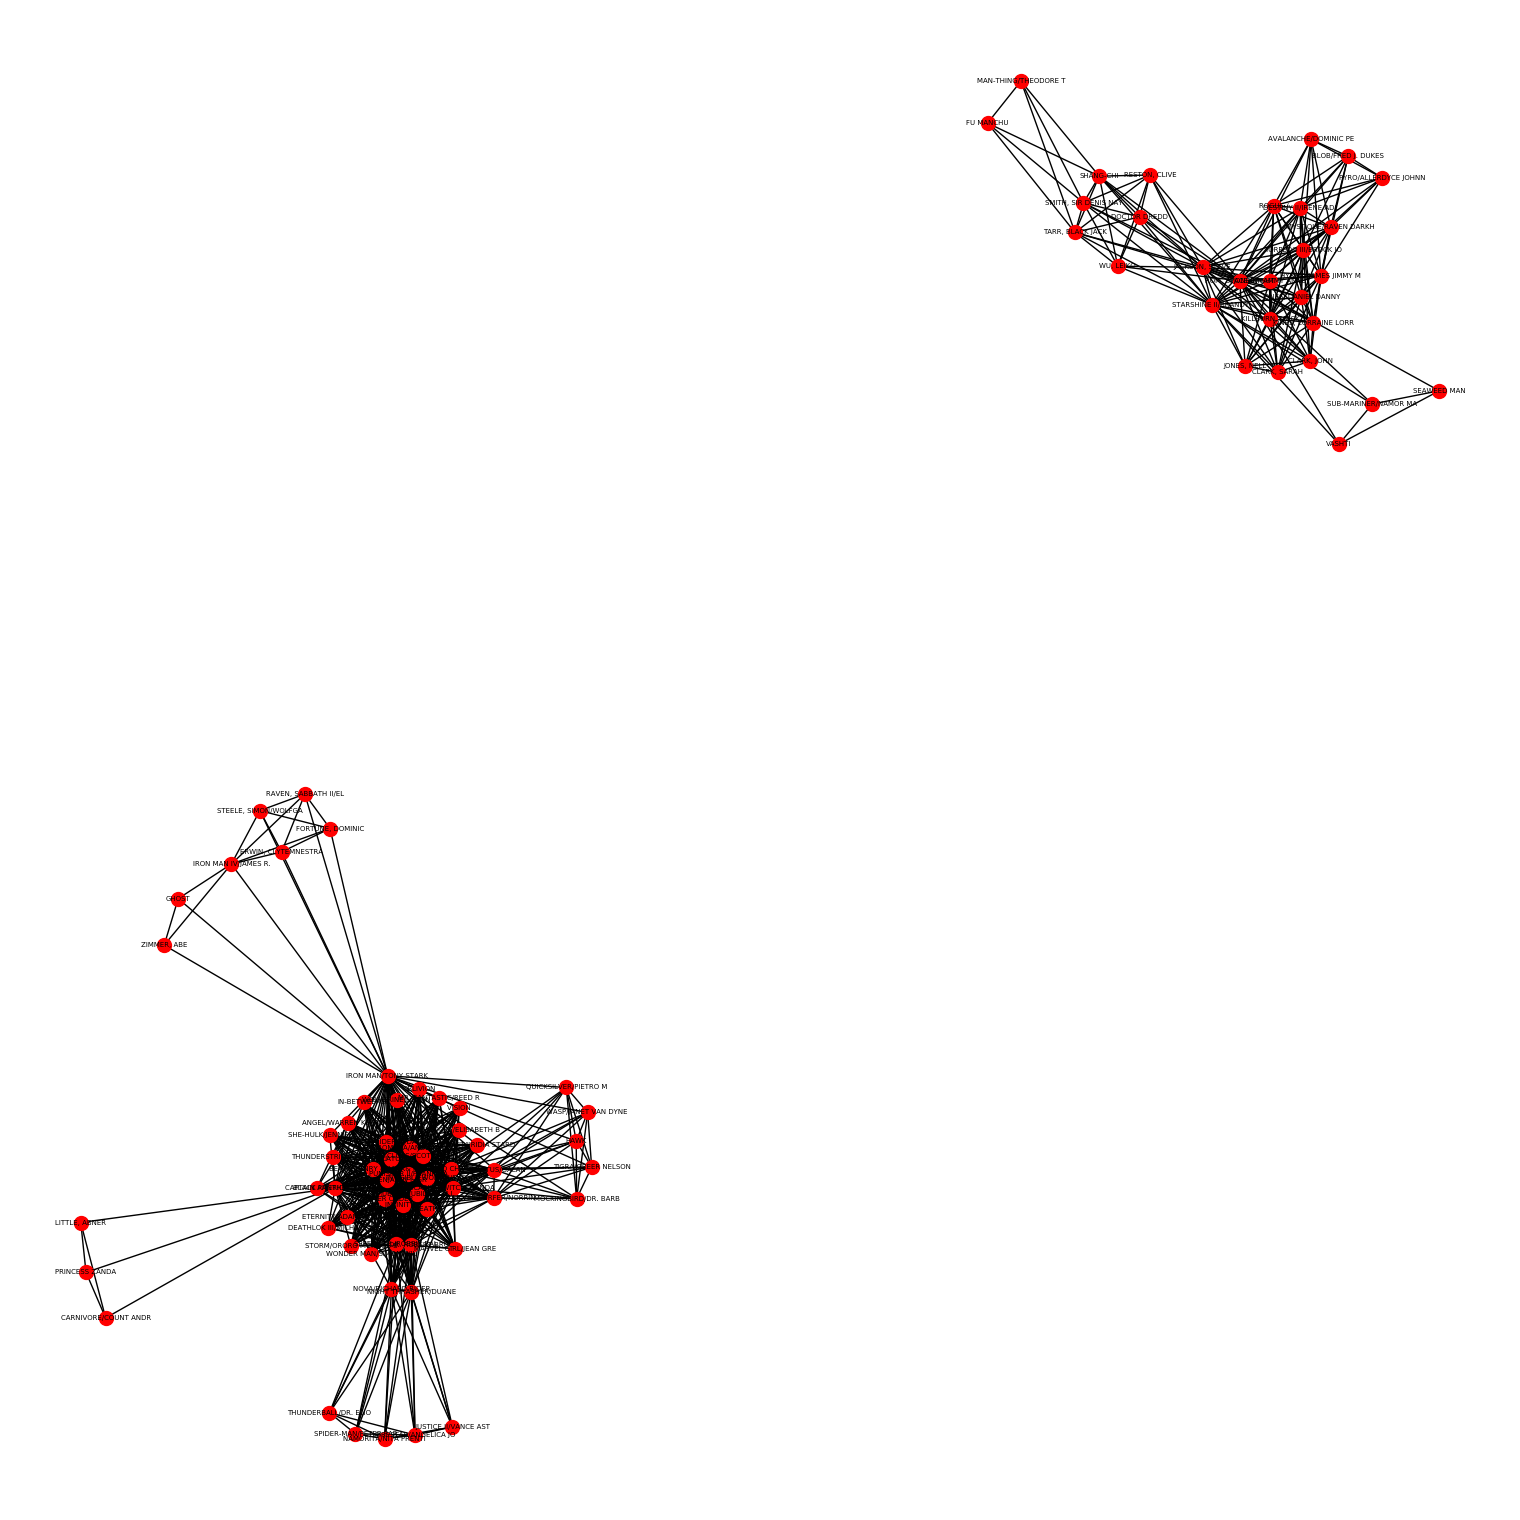

In [0]:
import pandas as pd
from networkx import spring_layout, fruchterman_reingold_layout
import numpy as  np
import matplotlib.pyplot as plt
import networkx as nx

hero_network = pd.read_csv('https://github.com/daryamukh/comics/blob/master/hero-network.csv?raw=true') 
network=np.array(hero_network) 

data=network
plt.figure(dpi=100,figsize=(15,15))
G = nx.Graph()
G.add_edges_from(data[:1000])

nx.draw(G ,node_color='r',node_size=100,with_labels=True,font_size=5,pos=fruchterman_reingold_layout(G))
plt.show()
 

Дополнительно

JOIN датафрймов

In [0]:

url = 'https://github.com/daryamukh/comics/blob/master/heroes.csv?raw=true'
heroes = pd.read_csv(url)

In [0]:
powers_plus = pd.merge(heroes,powers,  left_on= ['name'], right_on=['hero_names'])  

In [0]:
from heroes
join powers on name= hero_names

In [0]:
powers_plus.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,...,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total,total_new
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,A-Bomb,0,489,0,0,0,410,0,0,0,0,0,0,0,0,0,554,0,307,0,0,0,0,0,0,0,378,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,3414
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Abe Sapien,425,489,0,0,620,410,0,0,0,0,646,548,562,0,0,554,509,307,0,575,0,0,0,0,0,378,0,0,...,0,0,0,0,0,0,647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,8413
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,Abin Sur,0,0,656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,656
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,Abomination,0,489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,509,307,0,0,0,0,0,0,0,378,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3957
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,Abraxas,0,0,0,642,0,0,0,0,455,0,0,0,0,0,0,0,509,307,0,0,0,0,0,612,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,7853


In [0]:
powers_plus[powers_plus ['Enhanced Memory']>0]

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,...,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total,total_new
17,19,Amazo,Male,red,Android,-,257.0,DC Comics,-,bad,173.0,Amazo,425,0,656,0,0,410,0,0,455,0,646,548,0,659,0,554,509,307,648,575,0,520,651,612,0,378,0,0,...,0,0,0,0,0,645,0,0,0,648,0,0,644,0,633,0,0,0,0,0,0,648,0,0,0,0,644,644,0,0,0,0,0,0,0,0,0,0,44,25737
20,22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0,Angel,425,489,0,0,0,410,541,0,455,0,0,0,0,0,0,554,0,307,0,0,0,0,0,0,0,378,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,9531
21,23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0,Angel,425,489,0,0,0,410,541,0,455,0,0,0,0,0,0,554,0,307,0,0,0,0,0,0,0,378,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,9531
56,59,Bane,Male,-,Human,-,203.0,DC Comics,-,bad,180.0,Bane,0,0,0,0,0,410,0,0,0,0,0,0,0,0,0,0,0,307,0,0,0,0,0,0,0,378,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,2658
98,105,Black Panther,Male,brown,Human,Black,183.0,Marvel Comics,-,good,90.0,Black Panther,425,0,0,0,0,0,541,0,0,0,0,548,562,0,0,0,0,0,0,0,0,0,0,0,0,378,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,7301
126,139,Buffy,Female,green,Human,Blond,157.0,Dark Horse Comics,-,good,52.0,Buffy,425,489,0,0,0,410,541,0,0,637,0,0,0,0,0,0,0,307,0,0,0,0,0,0,0,378,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,5992
141,155,Captain Marvel,Female,blue,Human-Kree,Blond,180.0,Marvel Comics,-,good,74.0,Captain Marvel,425,489,0,0,620,410,0,590,455,637,0,548,0,0,0,554,509,307,0,0,0,520,0,0,0,378,0,0,...,0,0,0,0,661,0,0,0,0,0,0,0,644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,18627
142,156,Captain Marvel,Male,blue,Human,Black,193.0,DC Comics,-,good,101.0,Captain Marvel,425,489,0,0,620,410,0,590,455,637,0,548,0,0,0,554,509,307,0,0,0,520,0,0,0,378,0,0,...,0,0,0,0,661,0,0,0,0,0,0,0,644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,18627
185,209,Data,Male,yellow,Android,Brown,-99.0,Star Trek,-,good,-99.0,Data,425,0,0,0,620,410,0,0,0,0,0,0,0,0,0,554,509,307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,8752
190,214,Deathlok,Male,brown,Cyborg,Grey,193.0,Marvel Comics,-,good,178.0,Deathlok,425,0,0,0,0,410,0,0,0,0,0,0,0,0,0,0,509,307,0,0,0,0,0,0,0,378,0,0,...,0,0,0,0,0,0,0,0,0,648,0,0,0,0,0,645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,5509


Условие на строки

In [0]:
powers_plus [(powers_plus ['Enhanced Memory']>0) & (powers_plus ['Publisher'] =='Marvel Comics')]

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,...,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total,total_new
20,22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0,Angel,425,489,0,0,0,410,541,0,455,0,0,0,0,0,0,554,0,307,0,0,0,0,0,0,0,378,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,9531
98,105,Black Panther,Male,brown,Human,Black,183.0,Marvel Comics,-,good,90.0,Black Panther,425,0,0,0,0,0,541,0,0,0,0,548,562,0,0,0,0,0,0,0,0,0,0,0,0,378,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,7301
141,155,Captain Marvel,Female,blue,Human-Kree,Blond,180.0,Marvel Comics,-,good,74.0,Captain Marvel,425,489,0,0,620,410,0,590,455,637,0,548,0,0,0,554,509,307,0,0,0,520,0,0,0,378,0,0,...,0,0,0,0,661,0,0,0,0,0,0,0,644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,18627
190,214,Deathlok,Male,brown,Cyborg,Grey,193.0,Marvel Comics,-,good,178.0,Deathlok,425,0,0,0,0,410,0,0,0,0,0,0,0,0,0,0,509,307,0,0,0,0,0,0,0,378,0,0,...,0,0,0,0,0,0,0,0,0,648,0,0,0,0,0,645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,5509
280,313,Hawkeye II,Female,blue,Human,Black,165.0,Marvel Comics,-,good,57.0,Hawkeye II,0,0,0,0,0,0,0,0,0,0,0,0,562,0,0,0,0,0,0,0,0,0,0,0,0,378,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2246
496,552,Red Skull,Male,blue,-,No Hair,188.0,Marvel Comics,-,bad,108.0,Red Skull,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,642
617,682,Ultron,Male,red,Android,-,206.0,Marvel Comics,silver,bad,331.0,Ultron,425,0,0,0,0,410,541,590,455,0,0,0,0,0,0,0,0,307,0,0,659,520,0,0,0,378,0,0,...,0,0,0,0,0,0,0,660,0,0,0,0,0,0,633,0,0,0,0,0,0,0,0,0,0,0,644,644,0,0,0,0,0,0,0,0,0,0,25,14127


Группировка groupby

In [0]:
powers_plus[powers_plus['Height']>0].groupby('Publisher')['Height'].mean()

Publisher
DC Comics            181.046099
Dark Horse Comics    176.909091
George Lucas         183.916667
Image Comics         211.000000
J. R. R. Tolkien     279.000000
Marvel Comics        191.381188
Microsoft            213.000000
Rebellion            188.000000
Shueisha             171.500000
Sony Pictures        188.000000
Star Trek            181.500000
Team Epic TV         182.200000
Titan Books          183.000000
Name: Height, dtype: float64